### Importing the Libraries

In [102]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt

### Importing the DataSet

In [103]:
dataset = pd.read_csv('Position_Salaries.csv')

x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1:].values
y
# y.reshape(len(y),1)

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

### Feature Scaling

In [104]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)
sc_y = StandardScaler()
y = sc_y.fit_transform(y)

### Training the SVR model on the whole dataset

In [105]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
# y = column_or_1d(y, warn=True)
regressor.fit(x,y)

/home/elliot/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predicting a new Result

In [117]:
sc_y_inversed = regressor.predict(sc_x.transform([[6.5]]))
sc_y_reversed = sc_y.inverse_transform([sc_y_inversed])
print(sc_y_reversed)

[[170370.0204065]]


### Visualising the SVR Results

Text(0.5, 1.0, 'SVR')

Text(0.5, 0, 'Level')

Text(0, 0.5, 'salary')

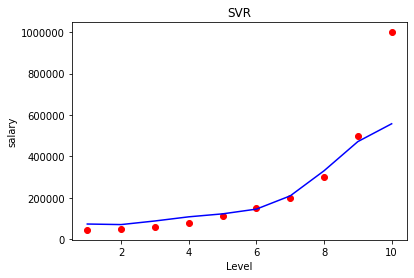

In [138]:
plt.title('SVR')
plt.xlabel('Level')
plt.ylabel('salary')

y_val = regressor.predict(x)
y_val = y_val.reshape(len(y_val), 1)
y_val = sc_y.inverse_transform(y_val)


plt.ticklabel_format(style='plain')
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y), color='red')

plt.plot(sc_x.inverse_transform(x), y_val, color='blue')

### Visualising the SVR Results (for higher resolution and smoother curve)

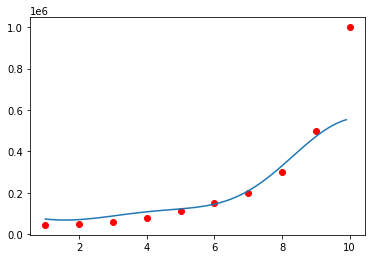

In [139]:
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)

plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color = 'red') 

y_grid = regressor.predict(sc_x.transform(x_grid))
y_grid = y_grid.reshape(len(y_grid),1)

plt.plot(x_grid, sc_y.inverse_transform(y_grid))